In [1]:
import dask.dataframe as dd

E:\Python\Python312\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
import pandas as pd

In [3]:
from dask.diagnostics import ProgressBar

In [4]:
import dask.array as da

In [5]:
df_pandas = pd.DataFrame({"palyer": da.array(["player" + str(i) for i in range(1,101)]),
                          "wage": da.random.randint(250, 450, 100), 
                          "age": da.random.randint(23, 38, 100)})

In [6]:
df_pandas

,palyer,wage,age
0,player1,435,35
1,player2,308,25
2,player3,346,35
3,player4,388,26
4,player5,429,36
...,...,...,...
95,player96,435,26
96,player97,252,35
97,player98,438,33
98,player99,423,25


In [7]:
df_dask = dd.from_pandas(df_pandas, npartitions=10)

In [8]:
df_dask

,palyer,wage,age
npartitions=10,,,
0,string,int32,int32
10,...,...,...
...,...,...,...
90,...,...,...
99,...,...,...


In [9]:
with ProgressBar():
    df_dask_age_count = df_dask["age"].value_counts().compute()
df_dask_age_count

[########################################] | 100% Completed | 109.80 ms


age
25    12
27    10
36    10
33     9
34     9
28     8
32     8
26     7
35     7
24     5
29     4
30     4
31     4
23     2
37     1
Name: count, dtype: int64

In [10]:
with ProgressBar():
    wage_mean = df_dask["wage"].mean().compute()
    wage_std = df_dask["wage"].std().compute()
    wage_maximum = df_dask["wage"].max().compute()
    wage_minimum = df_dask["wage"].min().compute()

[########################################] | 100% Completed | 109.78 ms
[########################################] | 100% Completed | 106.49 ms
[########################################] | 100% Completed | 107.70 ms
[########################################] | 100% Completed | 113.71 ms


In [11]:
wage_mean

351.06

In [12]:
wage_maximum

448

In [13]:
wage_minimum

250

In [14]:
wage_std

61.04573877202423

In [15]:
with ProgressBar():
    correlation_matrix = df_dask[["wage", "age"]].corr().compute()
correlation_matrix

[########################################] | 100% Completed | 231.48 ms


,wage,age
wage,1.000000,-0.100072
age,-0.100072,1.000000


In [16]:
import seaborn as sns

[########################################] | 100% Completed | 107.65 ms


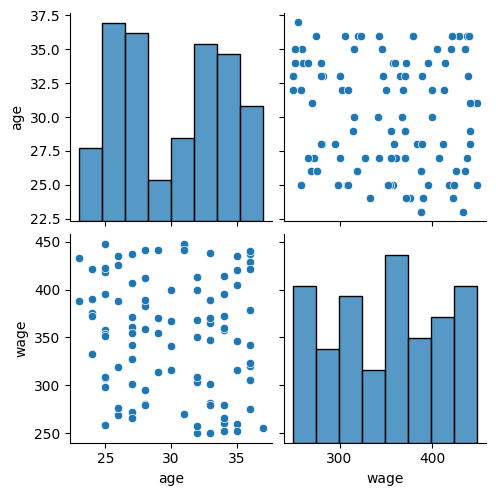

In [17]:
with ProgressBar():
    sns.pairplot(df_dask[["age", "wage"]].compute())